In [78]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import  SVC
from sklearn.metrics import accuracy_score,classification_report

In [79]:
df = pd.read_csv('emails.csv',encoding='latin-1')

In [80]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [81]:
df.dropna(inplace = True)

In [82]:
df

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5167,Email 5168,2,2,2,3,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
5168,Email 5169,35,27,11,2,6,5,151,4,3,...,0,0,0,0,0,0,0,1,0,0
5169,Email 5170,0,0,1,1,0,0,11,0,0,...,0,0,0,0,0,0,0,0,0,1
5170,Email 5171,2,7,1,0,2,1,28,2,0,...,0,0,0,0,0,0,0,1,0,1


In [83]:
df.drop(columns=['Email No.'], inplace=True)

In [84]:
df.head()

,the,to,ect,and,for,of,a,you,hou,in,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,0,0,1,0,0,0,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,8,13,24,6,6,2,102,1,27,18,...,0,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,0,8,0,0,4,...,0,0,0,0,0,0,0,0,0,0
3,0,5,22,0,5,1,51,2,10,1,...,0,0,0,0,0,0,0,0,0,0
4,7,6,17,1,5,2,57,0,9,3,...,0,0,0,0,0,0,0,1,0,0


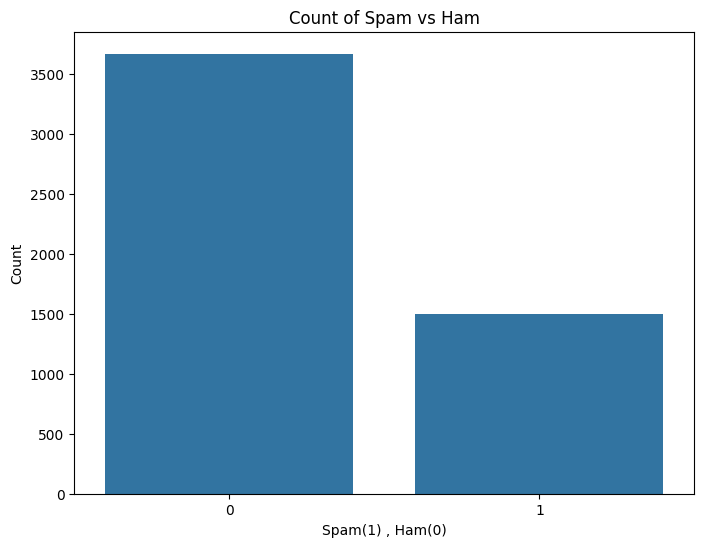

In [85]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Prediction' , data=df)
plt.title('Count of Spam vs Ham')
plt.xlabel('Spam(1) , Ham(0)')
plt.ylabel('Count')
plt.show();

In [86]:
X = df.drop(columns=['text'] , axis=1)
y = df['Prediction']


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [88]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [89]:
y_pred = mnb.predict(X_test)

In [90]:
y_pred

array([0, 0, 1, ..., 0, 1, 0])

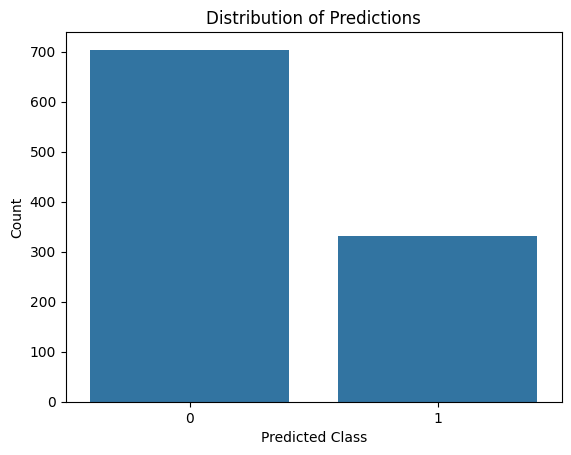

In [91]:
sns.countplot(x= y_pred)
plt.title('Distribution of Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.show();

In [92]:
mnb_accuracy = accuracy_score(y_test, y_pred)
mnb_classification_report = classification_report(y_test, y_pred)
print("Naive Bayes")
print("Accuracy of Multinomial Naive Bayes:", mnb_accuracy)
print("Classification Report of Multinomial Naive Bayes:\n", mnb_classification_report)

Naive Bayes
Accuracy of Multinomial Naive Bayes: 0.966183574879227
Classification Report of Multinomial Naive Bayes:
               precision    recall  f1-score   support

           0       1.00      0.95      0.98       739
           1       0.89      1.00      0.94       296

    accuracy                           0.97      1035
   macro avg       0.95      0.98      0.96      1035
weighted avg       0.97      0.97      0.97      1035



In [93]:
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [94]:
y_pred_svm= svm_classifier.predict(X_test)

In [95]:
y_pred_svm

array([0, 0, 1, ..., 0, 1, 0])

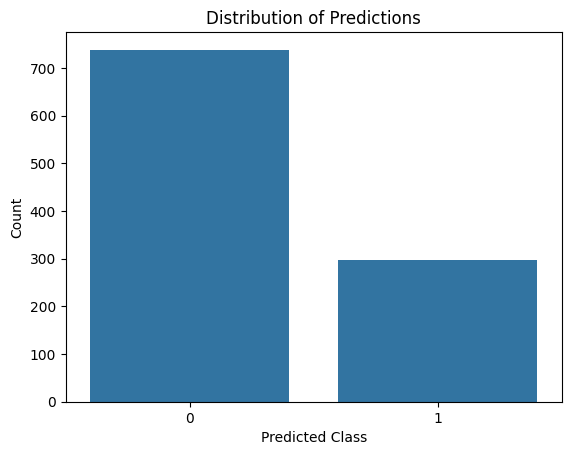

In [96]:
sns.countplot(x= y_pred_svm)
plt.title('Distribution of Predictions')
plt.xlabel('Predicted Class')
plt.ylabel('Count')
plt.show();

In [98]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_classification_report = classification_report(y_test, y_pred_svm)
print("Support Vector Machine")
print("Accuracy of Multinomial Naive Bayes:", svm_accuracy)
print("Classification Report of Multinomial Naive Bayes:\n", svm_classification_report)

Support Vector Machine
Accuracy of Multinomial Naive Bayes: 0.9971014492753624
Classification Report of Multinomial Naive Bayes:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       739
           1       0.99      1.00      0.99       296

    accuracy                           1.00      1035
   macro avg       1.00      1.00      1.00      1035
weighted avg       1.00      1.00      1.00      1035



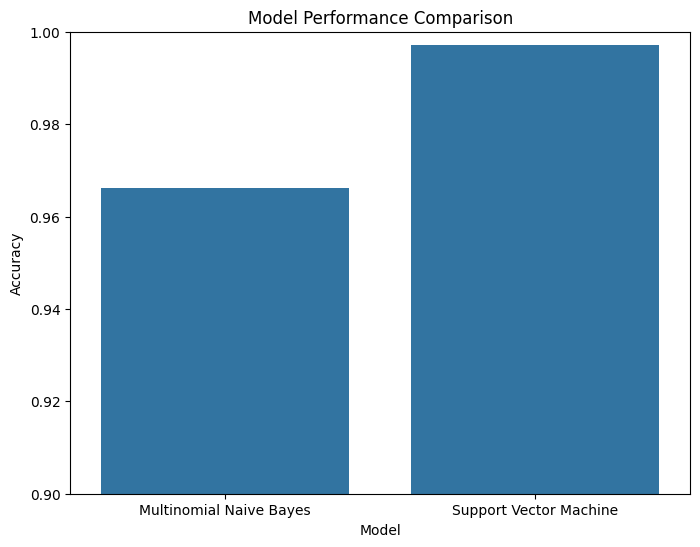

In [100]:
model_performance = pd.DataFrame({'Model': ['Multinomial Naive Bayes', 'Support Vector Machine'],
                                'Accuracy': [mnb_accuracy, svm_accuracy]})
plt.figure(figsize=(8, 6))
sns.barplot(x='Model', y='Accuracy', data=model_performance)
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0.9, 1.0)
plt.show();